<a href="https://colab.research.google.com/github/ArulR1006/Dataset/blob/main/notebook5e76b4f70e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview

This project predicts house sale prices from tabular property data (e.g., lot size, quality scores, neighborhood, year built). The goal is to learn patterns from historical sales and estimate the price of new homes given their features.

Type of Task

Supervised learning

Regression (continuous target: SalePrice)

Data Size & Structure

Training set: 1,460 rows with 79 input features (mixed numeric & categorical) and the target SalePrice.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# Load the data set

df = pd.read_csv('/content/train.csv')

df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Cleaning
Drop non-informative IDs, set target. Id doesn't contain any meaning information for the model.

In [5]:
X = df.drop('SalePrice', axis=1)
X = df.drop('Id', axis=1)

y = df['SalePrice']

Handle missing values

In [94]:
X = X.replace(['', 'NA', 'NaN'], np.nan)
num_cols = X.select_dtypes(include=["number"]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

Fix dtypes early (numbers as numbers, categories as categories)

In [7]:

#check columns for non numerical
for c in X.columns:
    if X[c].dtype == "object":
        tmp = pd.to_numeric(X[c], errors="coerce")
        if tmp.notna().sum() / len(tmp) > 0.9:
            X[c] = tmp

# Categorical features: set as category dtype
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
X[cat_cols] = X[cat_cols].apply(lambda s: s.astype("category"))

/tmp/ipython-input-1484648932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


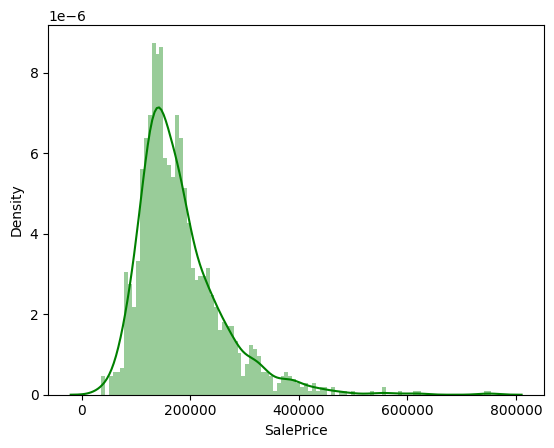

In [93]:
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


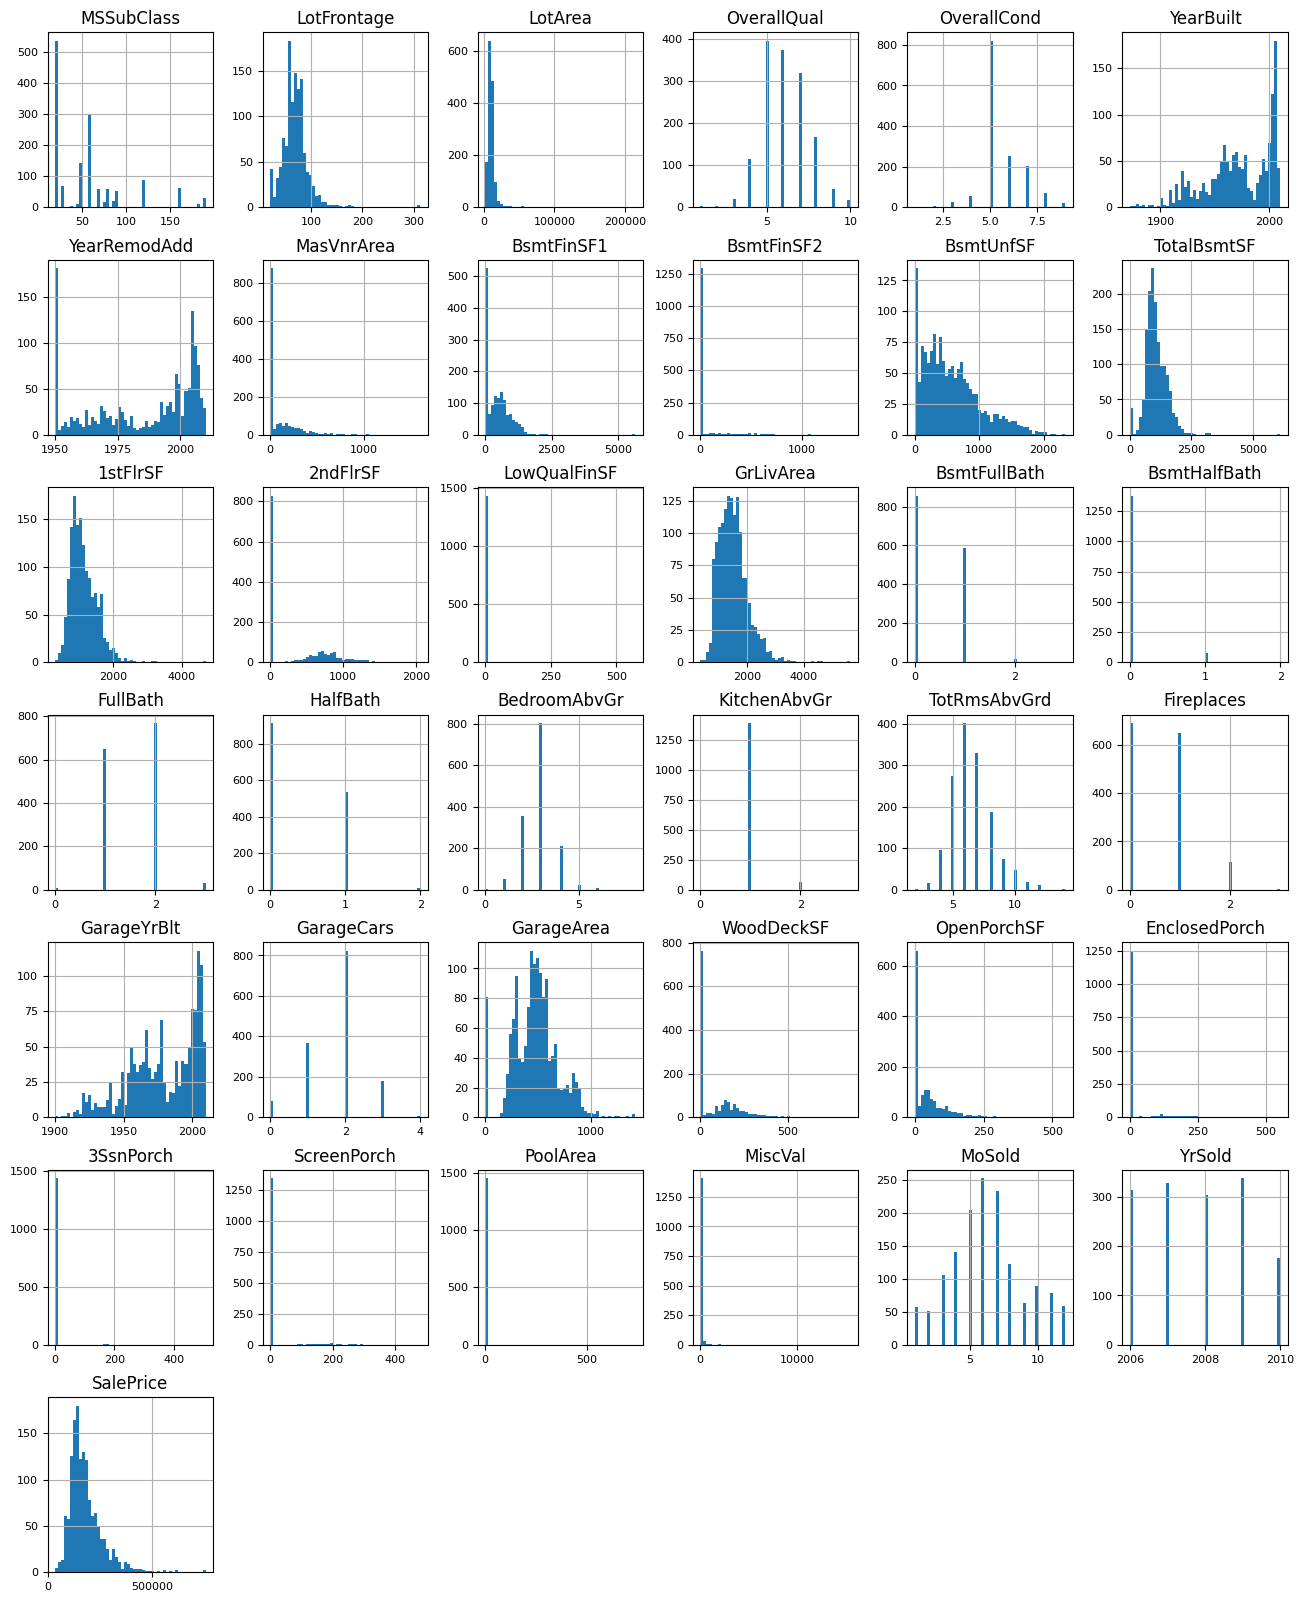

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop('Id', axis=1)
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [11]:
cat_cols = df.select_dtypes(include=["object","category"]).columns
display(df[cat_cols].nunique().sort_values(ascending=False).head(15))

,0
Neighborhood,25
Exterior2nd,16
Exterior1st,15
Condition1,9
SaleType,9
HouseStyle,8
RoofMatl,8
Condition2,8
Functional,7
BsmtFinType2,6


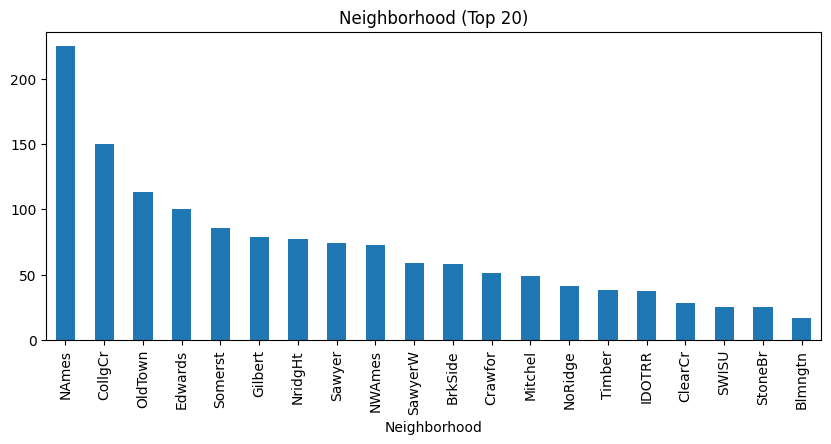

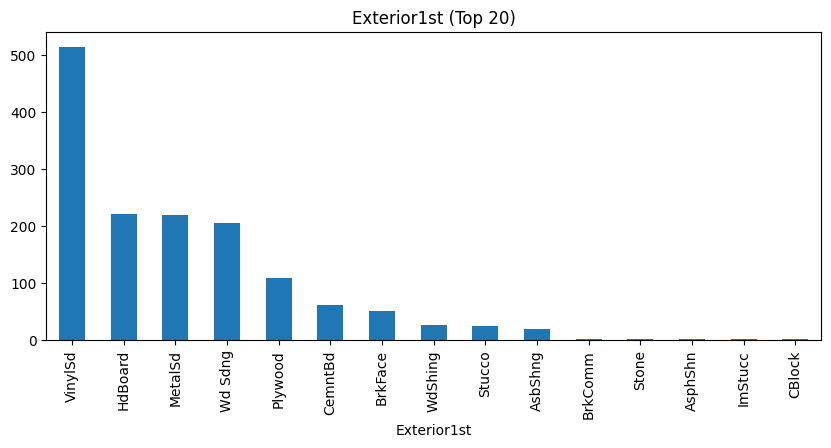

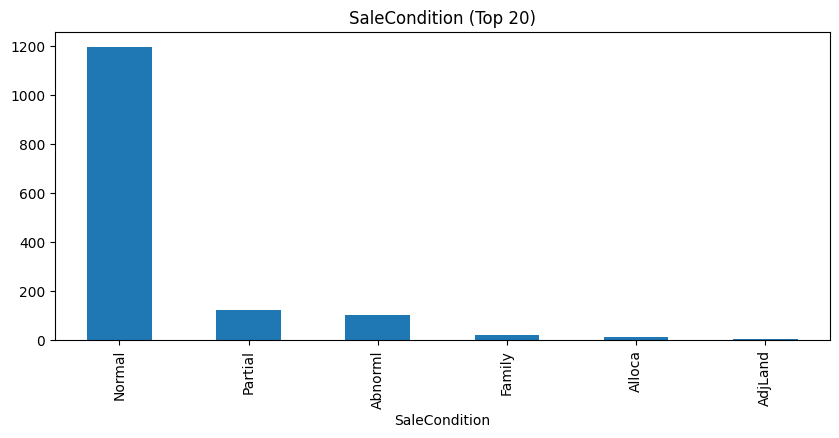

In [12]:
for c in ["Neighborhood","Exterior1st","SaleCondition"]:
    plt.figure(figsize=(10,4))
    df[c].value_counts().head(20).plot(kind="bar")
    plt.title(f"{c} (Top 20)"); plt.show()

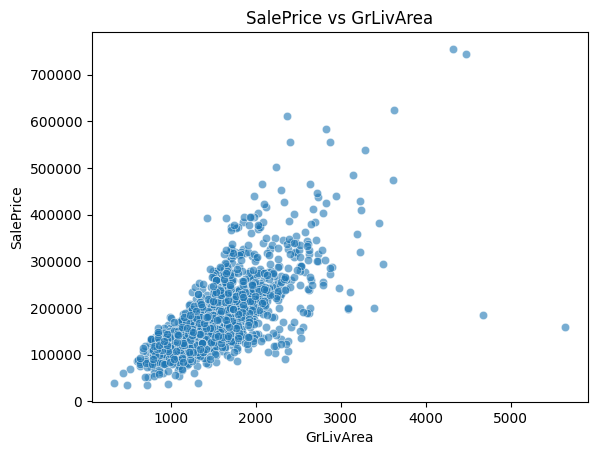

In [13]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", alpha=0.6)
plt.title("SalePrice vs GrLivArea"); plt.show()

In [19]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_cols)

In [22]:


params = dict(
    objective="regression",
    metric="rmse",
    learning_rate=0.03,
    num_leaves=10,
    max_depth=10,
    min_data_in_leaf=120,
    min_sum_hessian_in_leaf=8,
    min_gain_to_split=0.0,
    feature_fraction=0.85,
    bagging_fraction=0.85,
    bagging_freq=1,
    lambda_l2=2.0,
    lambda_l1=0.0,
    verbose=-1
)

model = lgb.train(
    params,
    train_data,
    num_boost_round=10000,
    valid_sets=[train_data, valid_data],
    valid_names=["train","valid_1"],
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(100)]
)

y_pred = model.predict(X_valid, num_iteration=model.best_iteration)


Training until validation scores don't improve for 200 rounds
[100]	train's rmse: 25965.6	valid_1's rmse: 37141.5
[200]	train's rmse: 23289	valid_1's rmse: 33978.4
[300]	train's rmse: 21920.5	valid_1's rmse: 32455.3
[400]	train's rmse: 20792.4	valid_1's rmse: 31346.4
[500]	train's rmse: 19843.4	valid_1's rmse: 30441.8
[600]	train's rmse: 19008.1	valid_1's rmse: 29705.7
[700]	train's rmse: 18312.1	valid_1's rmse: 29272.4
[800]	train's rmse: 17658	valid_1's rmse: 28793.5
[900]	train's rmse: 17075.9	valid_1's rmse: 28414.5
[1000]	train's rmse: 16514.2	valid_1's rmse: 28048.2
[1100]	train's rmse: 16026.6	valid_1's rmse: 27779.2
[1200]	train's rmse: 15567.1	valid_1's rmse: 27507.8
[1300]	train's rmse: 15129	valid_1's rmse: 27254.5
[1400]	train's rmse: 14718.8	valid_1's rmse: 27057.7
[1500]	train's rmse: 14346.1	valid_1's rmse: 26876.4
[1600]	train's rmse: 13979.6	valid_1's rmse: 26720.7
[1700]	train's rmse: 13608.3	valid_1's rmse: 26543.9
[1800]	train's rmse: 13274.4	valid_1's rmse: 26396.6

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_valid, y_pred)
print(  "R2 score: {:.2f}".format(r2))

R2 score: 0.92


In [25]:
rmse_model = 31070.6
std_target = y_valid.std()
improvement = 1 - rmse_model / std_target  # >0 means better than mean baseline
print(f"Improvement over baseline: {improvement:.2%}")

Improvement over baseline: 64.58%
